# 10. 데크, 우선순위 큐

- 스택과 큐의 특징을 모두 갖고 있는 자료형이 있으면 편할듯?

- Deque: Stack + Queue

- 데크와 추출순서가 일정하게 정해져 있지 않은 Priority Queue에 대해 알아볼거임

## 데크 (Double-Ended Queue, a.k.a. Deque)

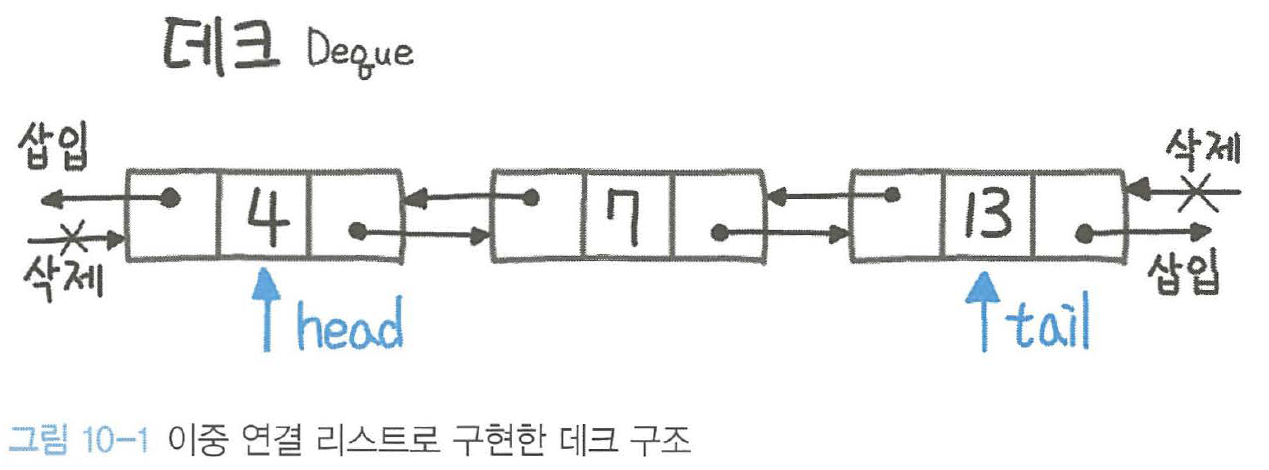

In [3]:
from collections import deque

d = deque()
print(type(d))

<class 'collections.deque'>
deque([1, 2, 3])


- 이중 연결리스트로 구현됨

- 왼쪽과 오른쪽의 인덱스 정보, 최대 길이 등 여러가지 부가 정보를 보관하고있음

## 10-26: 원형 데크 디자인

- 다음 연산을 제공하는 원형 데크를 디자인하라.

~~~
- MyCircularDeque(k): 데크 사이즈를 k로 지정하는 생성자다.
- insertFront(): 데크 처음에 아이템을 추가하고 성공할 경우 true를 리턴한다.
- insertLast(): 데크 마지막에 아이템을 추가하고 성공할 경우 true를 리턴한다.
- deleteFront(): 데크 처음에 아이템을 삭제하고 성공할 경우 true를 리턴한다.
- deleteLast(): 데크 마지막에 아이템을 삭제하고 성공할 경우 true를 리턴한다.
- getFront(): 데크의 첫 번째 아이템을 가져온다. 데크가 비어 있다면 -1을 리턴한다.
- getRear(): 데크의 마지막 아이템을 가져온다. 데크가 비어 있다면 -1을 리턴한다.
- isEmpty(): 데크가 비어있는지 여부를 판별한다.
- isFull(): 데크가 가득 차 있는지 여부를 판별한다.
~~~

### 풀이: 이중 연결 리스트를 이용한 데크 구현

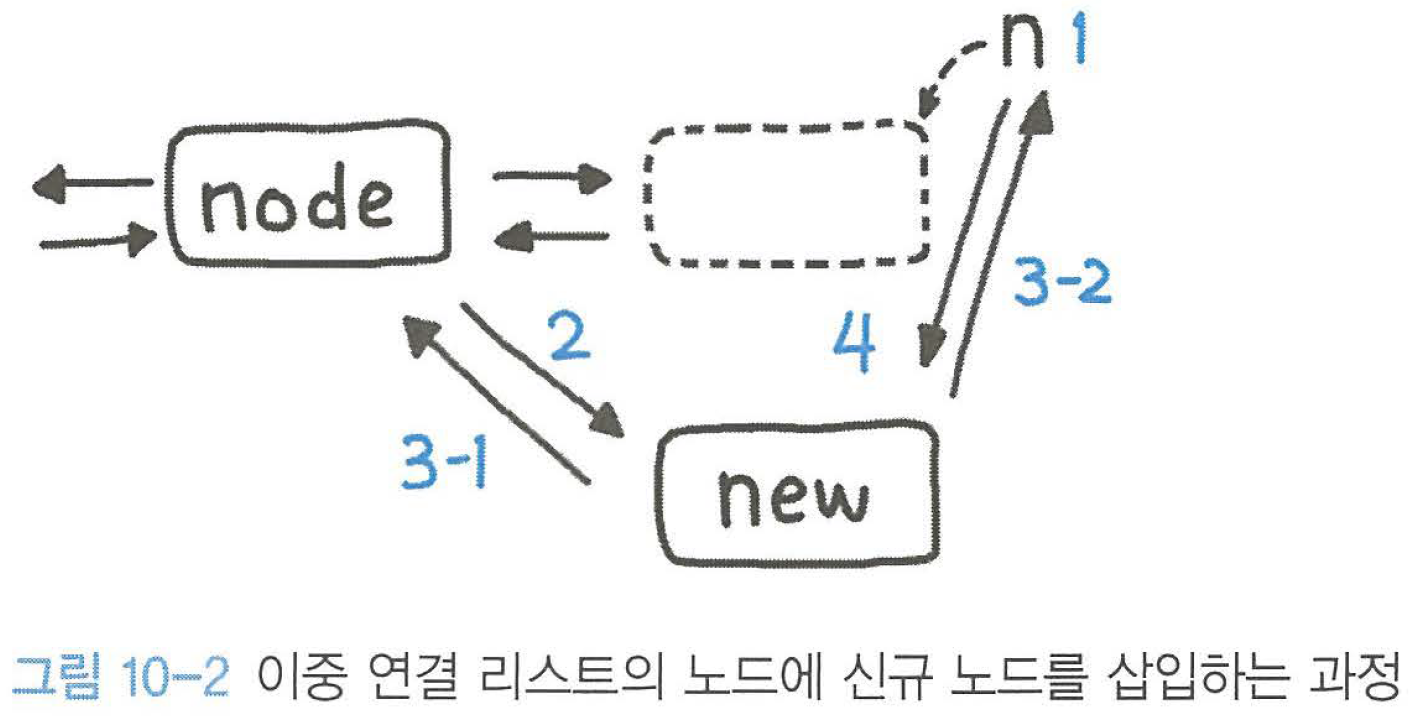

In [ ]:
# single-linked list
class ListNode:
  def __init__(self, x):
    self.val = x
    self.next = None

class MyCircularDeque:
  def __init__(self, k: int):
    self.head, self.tail = ListNode(None), ListNode(None)
    self.k, self.len = k, 0 # determine size of deque as 'k'
    self.head.right, self.tail.left = self.tail, self.head

  # 이중 연결 리스트에 신규 노드 삽입
  # node의 오른쪽에 new 삽임
  def _add(self, node: ListNode, new: ListNode):
    """
    이미 있는 노드를 찢어내고 그 사이에 새로운 노드 new를 삽임하는 형태
    """
    n = node.right 
    node.right = new
    new.left, new.right = node, n
    n.left = new

  def _del(self, node: ListNode):
    n = node.right.right
    node.right = n
    n.left = node

  # Head <=> n
  # Head <=> Value <=> n
  def insertFront(self, value: int) -> bool:
    # 최대 길이에 도달
    if self.len == self.k:
      return False
    self.len += 1
    # head 위치에 노드를 삽입하고 뒤쪽에 노드를 추가하는 연산
    self._add(self.head, ListNode(value))

    return True
  
  def insertLast(self, value: int) -> bool:
    if self.len == self.k:
      return False
    self.len += 1
    self._add(self.tail.left, ListNode(value))

    return True
  
  def deleteFront(self) -> bool:
    if self.len == 0:
      return False
    self.len -= 1
    self._del(self.head)

    return True
  
  def deleteLast(self) -> bool:
    if self.len == 0:
      return False
    self.len -= 1
    self._del(self.tail.left.left)

    return True

  def getFront(self) -> int:
    return self.head.right.val if self.len else -1
  
  def getRear(self) -> int:
    return self.tail.left.val if self.len else -1

  def isEmpty(self) -> bool:
    return self.len == 0

  def isFull(self) -> bool:
    return self.len == self.k

  
# 예제 넣어볼것

- 원형 데크 (Circular Deque)를 연결 리스트로 구현해봄

- 그런데 사실 원형 데크를 이중 연결 리스트로 구현하게 되면 원형의 이점을 전혀 살리 수 없게 된다

- 이점을 살리려면 배열로 구현해야함

- 원형으로 구현하는 이유는 뒤쪽으로 요소를 채우다가 공간이 다 차게 되면 tail과 head를 연결해 앞쪽의 빈 공간을 활용하려는 의도

- 그런데 연결 리스트는 애초에 빈공간이라는 개념이 존재하지 않음

- 그리고 데크는 맨 처음과 맨 끝의 값을 추출할 뿐이며 맨 끝의 다음 값을 추출하는지 등의 연산은 존재하지 않음

- 그렇기 때문에 서로 연결되어 있을 필요가 없음

## 우선순위 큐

- 우선순위 큐: 어떠한 특정 조건에 따라 우선순위가 가장 높은 요소가 추출되는 자료형

  e.g.) 큐에 [1, 4, 5, 3, 2]가 들어 있고 최댓값을 추출하는 우선순위가 있다고 하면 우선순위에 따라 5, 4, 3, 2, 1 순으로 추출됨

- n개의 요소를 정렬하는데 $S(n)$의 시간이 든다고 하면

- 새 요소를 삽입하거나 요소를 삭제하는데는 $O(S(n))$의 시간이 걸림

- 반면 내림차순으로 정렬했을 때 최댓값을 가져오는건 맨 앞에꺼를 가져오면 되므로 $O(1)$

- 대게 정렬에는 $O(nlogn)$이 필요하기 때문에 $O(S(n))$은 $O(nlogn)$ 정도가 들음

- 실제로는 이렇게 하진 않고 힙정렬 같이 더 효율적인걸 씀

- 이 밖에도 다익스트라 (Dijkstra) 알고리즘 등 우선순위 큐는 다양한 분야에 활용됨

- 힙 (Heap) 자료구조와도 관련이 깊음

## 10-27: k개 정렬 리스트 병합

- k 개의 정렬된 리스트를 1개의 정렬된 리스트로 병합하라.

~~~
- 입력 (k = 3)

[
  1->4->5,
  1->3->4,
  2->6
]

- 출력

1->1->2->3->4->4->5->6
~~~

### 풀이: 우선순위 큐를 이용한 리스트 병합

In [ ]:
import heapq
from typing import List

def mergeKLists(self, lists: List[ListNode]) -> ListNode:
  root = result = ListNode(None)
  heap = []

  # 각 연결 리스트의 루트를 힙에 저장
  for i in range(len(lists)):
    if lists[i]:
      heapq.heappush(heap, (lists[i].val, i, lists[i]))
  
  # 힙 추출 이후 다음 노드는 다시 저장
  while heap:
    node = heapq.heappop(heap)
    idx = node[1]
    result.next = node[2]

    result = result.next

    if result.next:
      heapq.heappush(heap, (result.next.val, idx, result.next))

  return root.next


#

In [4]:
# author: Jeiyoon
import random
import time
from typing import List

def roulette(people: List[str], parts: List[str]) -> None:
  random.shuffle(people)
  random.shuffle(parts)

  # 인원수 보다 파트가 더 많음 -> 랜덤으로 여러 파트 맡는 사람을 뽑는다
  gap = len(parts) - len(people)
  if gap > 0:
    # 중복 없이 추출
    random_index = random.sample(range(0, len(people)), gap) 

    for idx in random_index:
      people.append(people[idx] + "🎉")
      # people.append(people[idx])

  for part, person in zip(parts, people):
    print(part, person)


# 개념 28 to 31
people = ['박제윤', '이상원', '오예림', '허주희', '이하연', '이우빈', '임예람']
parts = ['개념', '28', '29', '30', '31']

print(time.strftime('%Y-%m-%d', time.localtime(time.time())))
roulette(people, parts)

2022-02-10
30 오예림
31 박제윤
개념 이우빈
29 허주희
28 이상원
